In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

Enter the variables for the CAMERA

It is assumed that the camera is placed at (0,0,0) and is oriented so that it is pointed in the positive z direction so that the z-axis is in the center of the field of view with the y-axis pointed downward in the field of view and the x-axis pointed to the right in the field of view

In [2]:
# Variables for the Camera
# FOV entries are in degrees
CAMERA_FOV_H = 90
CAMERA_FOV_V = 36

# RESOLUTION entries are in pixels
CAMERA_RESOLUTION_H = 1242
CAMERA_RESOLUTION_V = 375


Enter the variables for the size of the LIDAR

In [3]:
# Variables for the LIDAR
# FOV entries are in degrees
LIDAR_FOV_H = 45 # theta
LIDAR_FOV_V = 15

# RESOLUTION entries are in segments
LIDAR_RESOLUTION_H = 16
LIDAR_RESOLUTION_V = 2

# ROTATION entries are in degrees counter clockwise about the given axis looking in the positive direction
LIDAR_ROTATION_X = 0
LIDAR_ROTATION_Y = 0
LIDAR_ROTATION_Z = 0

# DISPLACEMENT entries are in feet and are performed after the rotations (offset of the LIDAR)
LIDAR_DISPLACEMENT_X = 0
LIDAR_DISPLACEMENT_Y = 10
LIDAR_DISPLACEMENT_Z = 0

# LIDAR_DISTANCE is the distance for rendering the LIDAR Grid Array and the Camera Image Plane
LIDAR_DISTANCE = 50


#### LIDAR_DISTANCE

Note that the parameter LIDAR_DISTANCE changes the distance at which the Camera Image Plane and the LIDAR grid array are rendered in the Jupyter Notebook. For this rendering, the location of the LGA coordinates will change with LIDAR_DISTANCE but so will the Camera Image Plane - The renderings change in size proportionally. 

The LIDAR_FOV values change the size of the LGA, the LIDAR_RESOLUTION values change the size and number of the individual segments within the LGA

With change in the LIDAR_DISPLACEMENT and the LIDAR_ROTATION values the location of the LGA will move with respect to the Camera Image Array but will change in size. 




In [4]:
# calculate the sines and cosines for the lidar transformation matrix
from math import cos, sin, tan
from math import radians

cx = cos(radians(LIDAR_ROTATION_X))
cy = cos(radians(LIDAR_ROTATION_Y))
cz = cos(radians(LIDAR_ROTATION_Z))
sx = sin(radians(LIDAR_ROTATION_X))
sy = sin(radians(LIDAR_ROTATION_Y))
sz = sin(radians(LIDAR_ROTATION_Z))



In [5]:
# create the matrices for the individual axis rotations
import numpy as np
Mx = [[1,   0,  0],
      [0,  cx, sx],
      [0, -sx, cx]]

My = [[ cy,   0,  sy],
      [  0,   1,  0 ],
      [-sy,   0,  cy]]

Mz = [[ cz, sz,  0],
      [-sz, cz,  0],
      [  0,  0,  1]]

mx = np.array(Mx, np.float64)
my = np.array(My, np.float64)
mz = np.array(Mz, np.float64)

m = np.dot(np.dot(mx, my),mz)

translate = np.array([[LIDAR_DISPLACEMENT_X, LIDAR_DISPLACEMENT_Y, LIDAR_DISPLACEMENT_Z, 1]], np.float64).T

M = np.concatenate([np.concatenate([m, np.zeros((1,3),np.float64)], axis = 0), translate], axis = 1)


<IPython.core.display.Javascript object>


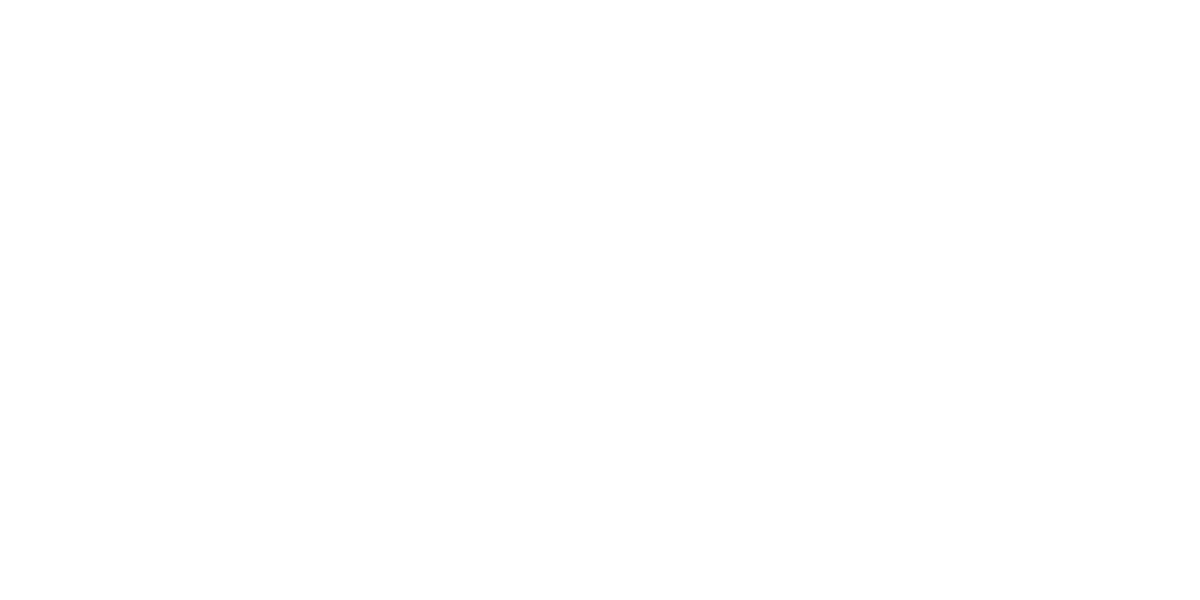

[0.0, 10.0, 0.0, 1.0]


Text(0.2, 11.0, 'Pprime (0.2000, 11.0000, 1.0000)')

In [6]:
# plot the primed and non-primed axes and an arbitrary vector that has been 
# transformed from the non-primed to the primed space
%matplotlib notebook

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
origin = [0,0,0,1]
xaxis = [1,0,0,1]
yaxis = [0,1,0,1]
zaxis = [0,0,1,1]
pt0 = origin
pt1 = xaxis
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='black',linestyle='dotted')
ax.text(pt1[0],pt1[1],pt1[2], 'x', size=20, zorder=1, color='k') 
pt0T = np.dot(M, np.array([pt0], np.float64).T)
pt1T = np.dot(M, np.array([pt1], np.float64).T)
pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
ax.text(pt1[0],pt1[1],pt1[2], 'xp', size=20, zorder=1, color='red') 

pt0 = origin; 
pt1 = yaxis
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='black',linestyle='dotted')
ax.text(pt1[0],pt1[1],pt1[2], 'y', size=20, zorder=1, color='k') 
pt0T = np.dot(M, np.array([pt0], np.float64).T)
pt1T = np.dot(M, np.array([pt1], np.float64).T)
pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
ax.text(pt1[0],pt1[1],pt1[2], 'yp', size=20, zorder=1, color='red') 

pt0 = origin; 
pt1 = zaxis
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='black',linestyle='dotted')
ax.text(pt1[0],pt1[1],pt1[2], 'z', size=20, zorder=1, color='k') 
pt0T = np.dot(M, np.array([pt0], np.float64).T)
pt1T = np.dot(M, np.array([pt1], np.float64).T)
pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
ax.text(pt1[0],pt1[1],pt1[2], 'zp', size=20, zorder=1, color='red') 

pt0 = origin; 
pt1 = [0.2,1,1,1]
ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color = 'blue')
ax.text(pt1[0],pt1[1],pt1[2], 'P ({0:0.4f}, {1:0.4f}, {2:0.4f})'.format(pt1[0],pt1[1],pt1[2]), size=20, zorder=1, color='blue') 

pt0T = np.dot(M, np.array([pt0], np.float64).T)
pt1T = np.dot(M, np.array([pt1], np.float64).T)
pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
print(pt0)

ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color = 'red')
ax.text(pt1[0],pt1[1],pt1[2], 'Pprime ({0:0.4f}, {1:0.4f}, {2:0.4f})'.format(pt1[0],pt1[1],pt1[2]), size=20, zorder=1, color='red') 


In [7]:
def plot_axes(ax, origin, xaxis, yaxis, zaxis, M):
    pt0 = origin
    pt1 = xaxis
    textsize = 10
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='black',linestyle='dotted')
    #ax.text(pt1[0],pt1[1],pt1[2], 'x', size=textsize, zorder=1, color='k') 
    pt0T = np.dot(M, np.array([pt0], np.float64).T)
    pt1T = np.dot(M, np.array([pt1], np.float64).T)
    pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
    pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
    #ax.text(pt1[0],pt1[1],pt1[2], 'xp', size=textsize, zorder=1, color='red') 

    pt0 = origin; 
    pt1 = yaxis
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='black',linestyle='dotted')
    #ax.text(pt1[0],pt1[1],pt1[2], 'y', size=textsize, zorder=1, color='k') 
    pt0T = np.dot(M, np.array([pt0], np.float64).T)
    pt1T = np.dot(M, np.array([pt1], np.float64).T)
    pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
    pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
    #ax.text(pt1[0],pt1[1],pt1[2], 'yp', size=textsize, zorder=1, color='red') 

    pt0 = origin; 
    pt1 = zaxis
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='black',linestyle='dotted')
    #ax.text(pt1[0],pt1[1],pt1[2], 'z', size=textsize, zorder=1, color='k') 
    pt0T = np.dot(M, np.array([pt0], np.float64).T)
    pt1T = np.dot(M, np.array([pt1], np.float64).T)
    pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
    pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
    #ax.text(pt1[0],pt1[1],pt1[2], 'zp', size=textsize, zorder=1, color='red') 
    return ax


In [8]:
def plot_3Darc(ax, center, M, d, theta0, phi0, theta1, phi1, nsegments, color, linestyle):
    m_theta = (theta1 - theta0) / nsegments
    b_theta = theta0
    m_phi = (phi1 - phi0) / nsegments
    b_phi = phi0
    for i in range(nsegments):
        # calculate the start and end angles of the tiny segment of the arc
        th0 = m_theta*i + b_theta
        th1 = m_theta*(i+1) + b_theta
        ph0 = m_phi*i + b_phi
        ph1 = m_phi*(i+1) + b_phi
        # get the xyz coordinates in the space
        x0 = d*cos(radians(th0))*sin(radians(ph0)) + center[0]
        x1 = d*cos(radians(th1))*sin(radians(ph1)) + center[0]
        y0 = d*sin(radians(th0)) + center[1]
        y1 = d*sin(radians(th1)) + center[1]
        z0 = d*cos(radians(th0))*cos(radians(ph0)) + center[2]
        z1 = d*cos(radians(th1))*cos(radians(ph1)) + center[2]
        pt0 = [x0,y0,z0,1]
        pt1 = [x1,y1,z1,1]        
        # translate to the new coordinate system if needed.
        pt0T = np.dot(M, np.array([pt0], np.float64).T)
        pt1T = np.dot(M, np.array([pt1], np.float64).T)
        pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
        pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]

        # plot the tiny segment of the arc as a straight line.
        ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color=color,linestyle=linestyle)
    return ax

In [9]:
def plot_camera_fov(ax, d_center, camera_fov_h, camera_fov_v):
    dx = d_center * tan(radians(camera_fov_h/2))
    dy = d_center * tan(radians(camera_fov_v/2))
    pt0 = [-dx, -dy, d_center]
    pt1 = [dx, -dy, d_center]
    pt2 = [dx, dy, d_center]
    pt3 = [-dx, dy, d_center]
    ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='blue',linestyle='dotted')
    ax.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],[pt1[2],pt2[2]],color='blue',linestyle='dotted')
    ax.plot([pt2[0],pt3[0]],[pt2[1],pt3[1]],[pt2[2],pt3[2]],color='blue',linestyle='dotted')
    ax.plot([pt3[0],pt0[0]],[pt3[1],pt0[1]],[pt3[2],pt0[2]],color='blue',linestyle='dotted')
    return ax


In [10]:
def plot_camera_fov_arc(ax, d_center, camera_fov_h, camera_fov_v):
    Mcam = [[1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1]]
    dth = camera_fov_v/2
    dph = camera_fov_h/2
    # plot_3Darc(ax, center, M, d, theta0, phi0, theta1, phi1, nsegments, color, linestyle)
    plot_3Darc(ax, [0,0,0,1], Mcam, LIDAR_DISTANCE, -dth, -dph,  dth, -dph, 10, 'blue', 'dotted')
    plot_3Darc(ax, [0,0,0,1], Mcam, LIDAR_DISTANCE,  dth, -dph,  dth,  dph, 10, 'blue', 'dotted')
    plot_3Darc(ax, [0,0,0,1], Mcam, LIDAR_DISTANCE,  dth,  dph, -dth,  dph, 10, 'blue', 'dotted')
    plot_3Darc(ax, [0,0,0,1], Mcam, LIDAR_DISTANCE, -dth,  dph, -dth, -dph, 10, 'blue', 'dotted')
    
    return ax


In [11]:
def plot_lidar_fov(ax, d_center, lidar_fov_h, lidar_fov_v, lidar_res_h, lidar_res_v):
    mx = lidar_fov_h / lidar_res_h
    my = lidar_fov_v / lidar_res_v
    bx = -lidar_fov_h / 2
    by = -lidar_fov_v / 2

    for i in range(lidar_res_h+1):
        anglex = mx*i + bx
        angley = by
        x = d_center*tan(radians(anglex))
        y = d_center*tan(radians(angley))
        pt0 = [x, -y, d_center,1]
        pt1 = [x, y, d_center,1]
        pt0T = np.dot(M, np.array([pt0], np.float64).T)
        pt1T = np.dot(M, np.array([pt1], np.float64).T)
        pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
        pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
        ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')

    for i in range(lidar_res_v+1):
        anglex = bx
        angley = my*i + by
        x = d_center*tan(radians(anglex))
        y = d_center*tan(radians(angley))
        pt0 = [x, y, d_center,1]
        pt1 = [-x, y, d_center,1]
        pt0T = np.dot(M, np.array([pt0], np.float64).T)
        pt1T = np.dot(M, np.array([pt1], np.float64).T)
        pt0 = [pt0T[0,0],pt0T[1,0],pt0T[2,0],pt0T[3,0]]
        pt1 = [pt1T[0,0],pt1T[1,0],pt1T[2,0],pt1T[3,0]]
        ax.plot([pt0[0],pt1[0]],[pt0[1],pt1[1]],[pt0[2],pt1[2]],color='red',linestyle='dotted')
        
    return ax
        

In [12]:
def plot_lidar_fov_arc(ax, d_center, lidar_fov_h, lidar_fov_v, lidar_res_h, lidar_res_v):
    mx = lidar_fov_h / lidar_res_h
    my = lidar_fov_v / lidar_res_v
    bx = -lidar_fov_h / 2
    by = -lidar_fov_v / 2

    for i in range(lidar_res_h+1):
        phi = mx*i + bx
        theta = by
        plot_3Darc(ax, [0,0,0,1], M, LIDAR_DISTANCE, -theta,  phi, theta, phi, 10, 'red', 'dotted')
        
    for i in range(lidar_res_v+1):
        phi = bx
        theta = my*i + by
        plot_3Darc(ax, [0,0,0,1], M, LIDAR_DISTANCE, theta,  -phi, theta, phi, 10, 'red', 'dotted')
        
    return ax

<IPython.core.display.Javascript object>


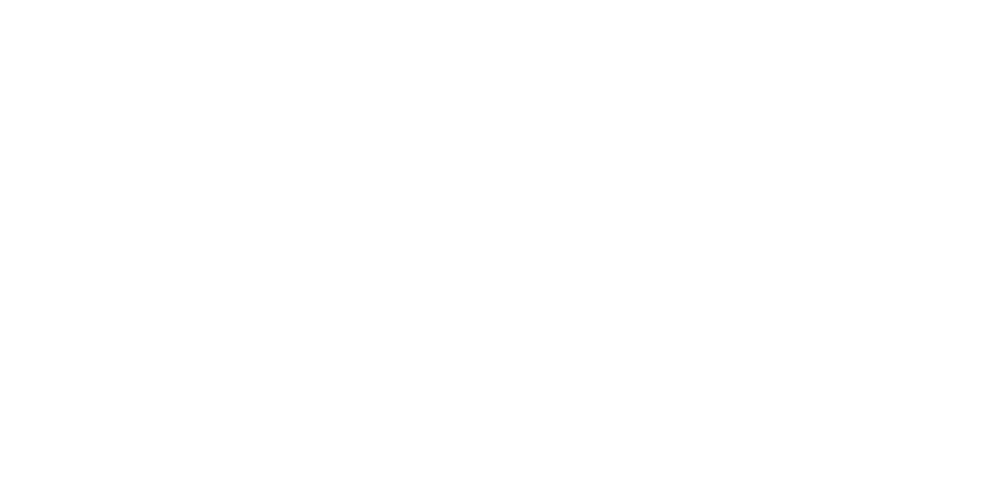

In [13]:
%matplotlib notebook

origin = [0,0,0,1]
xaxis = [10,0,0,1]
yaxis = [0,10,0,1]
zaxis = [0,0,10,1]

fig2 = plt.figure(figsize=(10, 5))
ax2 = fig2.add_subplot(111, projection='3d')

ax2 = plot_axes(ax2, origin, xaxis, yaxis, zaxis, M)
# plot_3Darc(ax, center, d, theta0, phi0, theta1, phi1, nsegments, color, linestyle)
#ax2 = plot_3Darc(ax2, [50,50,50], 100, 0, 0, 0, 360, 100, 'blue', 'dotted')

#ax2 = plot_camera_fov(ax2, LIDAR_DISTANCE, CAMERA_FOV_H, CAMERA_FOV_V)
#ax2 = plot_lidar_fov(ax2, LIDAR_DISTANCE, LIDAR_FOV_H, LIDAR_FOV_V, LIDAR_RESOLUTION_H, LIDAR_RESOLUTION_V)
ax2 = plot_camera_fov(ax2, LIDAR_DISTANCE, CAMERA_FOV_H, CAMERA_FOV_V)
ax2 = plot_lidar_fov(ax2, LIDAR_DISTANCE, LIDAR_FOV_H, LIDAR_FOV_V, LIDAR_RESOLUTION_H, LIDAR_RESOLUTION_V)


<IPython.core.display.Javascript object>


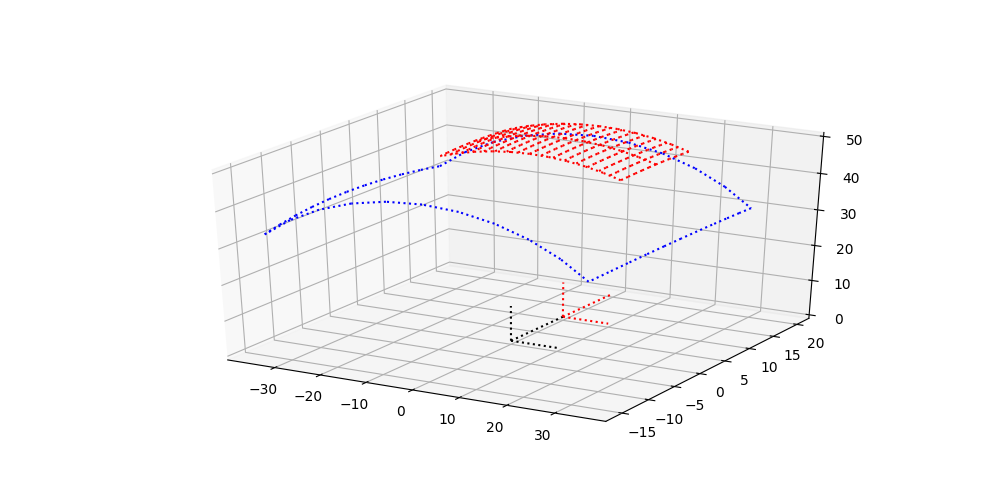

In [14]:
%matplotlib notebook

origin = [0,0,0,1]
xaxis = [10,0,0,1]
yaxis = [0,10,0,1]
zaxis = [0,0,10,1]

fig3 = plt.figure(figsize=(10, 5))
ax3 = fig3.add_subplot(111, projection='3d')

ax3 = plot_axes(ax3, origin, xaxis, yaxis, zaxis, M)
# plot_3Darc(ax, center, d, theta0, phi0, theta1, phi1, nsegments, color, linestyle)
#plot_3Darc(ax2, origin, 100, 0, 0, 0, 360, 100, 'blue', 'dotted')

#ax2 = plot_camera_fov(ax2, LIDAR_DISTANCE, CAMERA_FOV_H, CAMERA_FOV_V)
#ax2 = plot_lidar_fov(ax2, LIDAR_DISTANCE, LIDAR_FOV_H, LIDAR_FOV_V, LIDAR_RESOLUTION_H, LIDAR_RESOLUTION_V)
ax3 = plot_camera_fov_arc(ax3, LIDAR_DISTANCE, CAMERA_FOV_H, CAMERA_FOV_V)
ax3 = plot_lidar_fov_arc(ax3, LIDAR_DISTANCE, LIDAR_FOV_H, LIDAR_FOV_V, LIDAR_RESOLUTION_H, LIDAR_RESOLUTION_V)
